Importing the requires libraries

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

reading the files

In [3]:
df = pd.read_csv('/content/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


checking for missing values

In [4]:
mv = df.isnull().sum()
mv

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

heatmap

In [5]:
correlation_matrix = df.corr()

<ipython-input-5-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


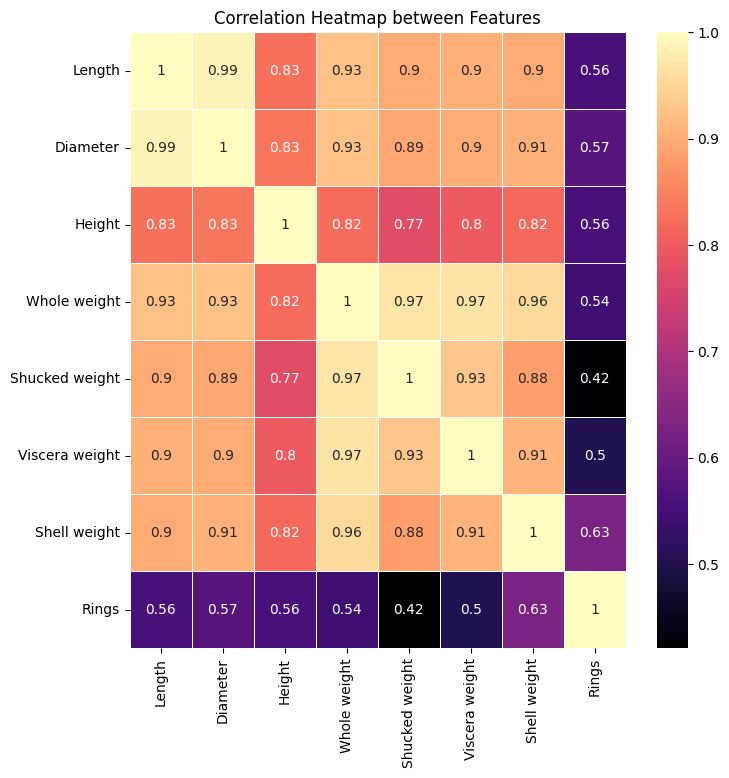

In [6]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma',  linewidths=.5)
plt.title('Correlation Heatmap between Features')
plt.show()

Label encoding for the sex column

In [12]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Type
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,2
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


applying knn model

In [14]:
X = df.drop('Rings', axis=1)
y = df['Rings']

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [25]:
y_pred = knn.predict(X_test)

In [26]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 1.6119617224880383


In [22]:
rmse_val = []
k_list = []

for k in range(50):
  k=k+1
  model=neighbors.KNeighborsRegressor(n_neighbors = k)
  model.fit(X_train,y_train)
  pred=model.predict(X_test)
  error=sqrt(mean_squared_error(y_test,pred))
  rmse_val.append(error)
  k_list.append(k)

In [30]:
best_rmse_score=min(rmse_val)
ideal_k=k_list[rmse_val.index(best_rmse_score)]
print("ideal K value = ", ideal_k, "with least RMS", best_rmse_score)

ideal K value =  11 with least RMS 2.2597651240587058
